In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from queries.calendar_table import SELECT_CALENDAR_TABLE
from cursor_execute import cursor_execute

%matplotlib inline
plt.rcParams["font.family"] = "TakaoGothic"

In [27]:
d = cursor_execute(SELECT_CALENDAR_TABLE)
df = pd.DataFrame(
    d, 
    columns=['id', 'year', 'url', 'title', 'category', 'author',
    'parts', 'likes', 'subsc', 'items', 'actual_items']
)

In [28]:
df.head(100)

,id,year,url,title,category,author,parts,likes,subsc,items,actual_items
0,1,2015,https://qiita.com/advent-calendar/2015/comme_t...,title,To Be Decided,xxl,6,18,2,6,6
1,2,2015,https://qiita.com/advent-calendar/2015/elastic...,title,To Be Decided,JapornLady,1,0,8,3,0
2,3,2015,https://qiita.com/advent-calendar/2015/redis_p...,title,Services / Applications,JapornLady,2,0,5,2,0
3,4,2015,https://qiita.com/advent-calendar/2015/temona,title,Company,devopsCoordinator,4,22,1,6,4
4,5,2015,https://qiita.com/advent-calendar/2015/php-fiz...,title,To Be Decided,yohei_oyama,1,0,2,5,5
5,6,2015,https://qiita.com/advent-calendar/2015/mmtest,title,Miscellaneous,ikedon0505,1,0,10,25,25
6,7,2015,https://qiita.com/advent-calendar/2015/akuapurane,title,Programming Langs,akuaputa,0,0,1,0,0
7,8,2015,https://qiita.com/advent-calendar/2015/rmarkdown,title,To Be Decided,kazutan,1,68,11,18,18
8,9,2015,https://qiita.com/advent-calendar/2015/scikit-...,title,Libraries / Frameworks,yoehara,1,0,10,1,0
9,10,2015,https://qiita.com/advent-calendar/2015/mysql_m...,title,Databases,sakaik,1,0,16,25,25


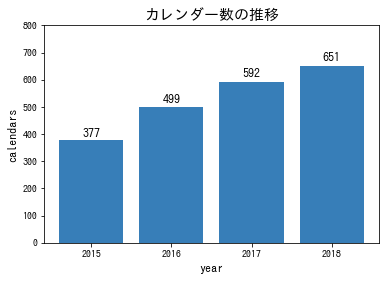

In [55]:
# カレンダー数の推移

df_tmp = df.groupby("year").size()
plt.bar(
    x=df_tmp.index, height=df_tmp.values,
    color="#377eb8"
)
plt.title("カレンダー数の推移", fontsize=15)
plt.xlabel("year", fontsize=12)
plt.ylabel("calendars", fontsize=12)
plt.ylim(0, 800)

for x, y in zip(df_tmp.index, df_tmp.values):
    plt.text(x, y*1.02, y, ha="center", va="bottom", fontsize=12)
plt.show()

In [34]:
df_tmp = df.groupby("year").sum()
df_tmp

,id,parts,likes,subsc,items,actual_items
year,,,,,,
2015,71253,4580,69299,29897,7185,6792
2016,312873,6440,76155,28431,9762,9215
2017,694120,7495,93825,40458,11551,11003
2018,1167894,8474,41745,36089,11812,11391


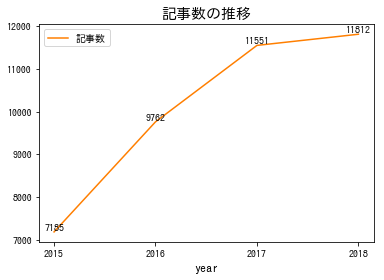

In [28]:
# 記事数の推移

df_tmp = df.groupby("year").sum()

plt.plot(
    df_tmp.index, df_tmp.values[:,4],
    color="#ff7f00", label="記事数"
)
plt.title("記事数の推移", fontsize=15)
plt.xlabel("year", fontsize=12)
plt.legend()

for x, y in zip(df_tmp.index, df_tmp.values):
    plt.text(x, y[4], y[4], ha="center", va="bottom")

plt.show()

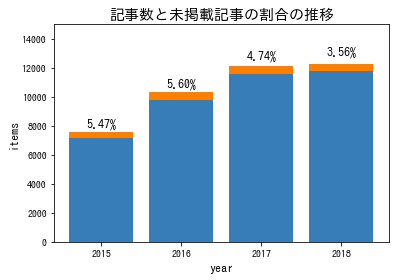

In [57]:
# 記事数と未掲載記事の割合の推移

df_tmp = df.groupby("year").sum()
plt.bar(
    x=df_tmp.index, height=df_tmp.values[:,4],
    color="#377eb8"
)
plt.bar(
    x=df_tmp.index, height=df_tmp.values[:,4]-df_tmp.values[:,5],
    color="#ff7f00", bottom=df_tmp.values[:,4]
)
plt.title("記事数と未掲載記事の割合の推移", fontsize=15)
plt.xlabel("year", fontsize=12)
plt.ylabel("items", fontsize=12)
plt.ylim(0, 15000)

for x, y in zip(df_tmp.index, df_tmp.values):
    percent = "{:.2f}%".format((1- (y[5]/y[4])) * 100)
    plt.text(x, y[4]*1.08, percent, ha="center", va="bottom", fontsize=12)
    
plt.show()

In [24]:
query = '''
SELECT
  year
  , COUNT(url) AS items
  , SUM(CASE WHEN url LIKE '%qiita%' THEN 1 ELSE 0 END) AS items2
FROM
  CALENDARS
GROUP BY
  year
;
'''
d = cursor_execute(query)
df = pd.DataFrame(
    d, 
    columns=['year', 'items', 'items2']
)
df

,year,items,items2
0,2015,377,377
1,2016,499,499
2,2017,592,592
3,2018,651,651


In [ ]:
# Qiitaに書かれた記事とそうでない記事の割合の推移

df_tmp = df.groupby("year").sum()
plt.bar(
    x=df_tmp.index, height=df_tmp.values[:,4],
    color="#377eb8"
)
plt.bar(
    x=df_tmp.index, height=df_tmp.values[:,4]-df_tmp.values[:,5],
    color="#ff7f00", bottom=df_tmp.values[:,4]
)
plt.title("記事数と未掲載記事の割合の推移", fontsize=15)
plt.xlabel("year", fontsize=12)
plt.ylabel("items", fontsize=12)
plt.ylim(0, 15000)

for x, y in zip(df_tmp.index, df_tmp.values):
    percent = "{:.2f}%".format((1- (y[5]/y[4])) * 100)
    plt.text(x, y[4]*1.08, percent, ha="center", va="bottom", fontsize=12)
    
plt.show()

In [ ]:
query = '''
SELECT
  year
  , 
FROM
  CALENDARS
'''
d = cursor_execute(query)
df = pd.DataFrame(
    d, 
    columns=['id', 'year', 'url', 'title', 'category', 'author',
    'parts', 'likes', 'subsc', 'items', 'actual_items']
)

# やるべきこと

- 記事のURLを取得
- 年ごとの記事のランキング各種、表作成
- その他グラフ作成
- 記事作成